In [17]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib

In [18]:
data = pd.read_csv("/content/phishing.csv")
data.head(50)

,url,status
0,159.203.90.151/api/,0
1,www.bacgarageservices.co.uk/wp-content/themes/...,0
2,http://jaaeza.com/dribrahim/document-shared439...,0
3,jundajx.com/Images?us.battle.net/login/en/?ref...,0
4,www.smxszz.com/images/?us.battle.net/login/en/...,0
5,http://plataformaeducativa.se.jalisco.gob.mx/e...,0
6,tr33osbbs.org.tr/securedoc/nD/nD/,0
7,smcbas.jp,0
8,5000-coinbase.com,0
9,www.twitteronbusiness.com/~tracbcom/images/wbs...,0


In [19]:
def extract_features(url):
    features = {}
    features['panjang_url'] = len(url)
    features['protokol'] = int("https" in url)
    features['sepsial_karakter'] = sum([1 for char in url if char in ['@', '-', '_', '%', '.', '=', '&']])
    features['jumlah_digit'] = sum([1 for char in url if char.isdigit()])
    features['jumlah_subdomain'] = url.count('.') - 1
    features['ipaddress'] = int(bool(re.search(r'[0-9]+(?:\.[0-9]+){3}', url)))
    return features

In [20]:
features = data['url'].apply(lambda x: extract_features(x))
features_df = pd.DataFrame(list(features))

In [21]:
X = features_df
y = data['status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model_regressor = RandomForestRegressor(random_state=42)
model_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = model.predict(X_test)
y_pred_prob = model_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_prob)

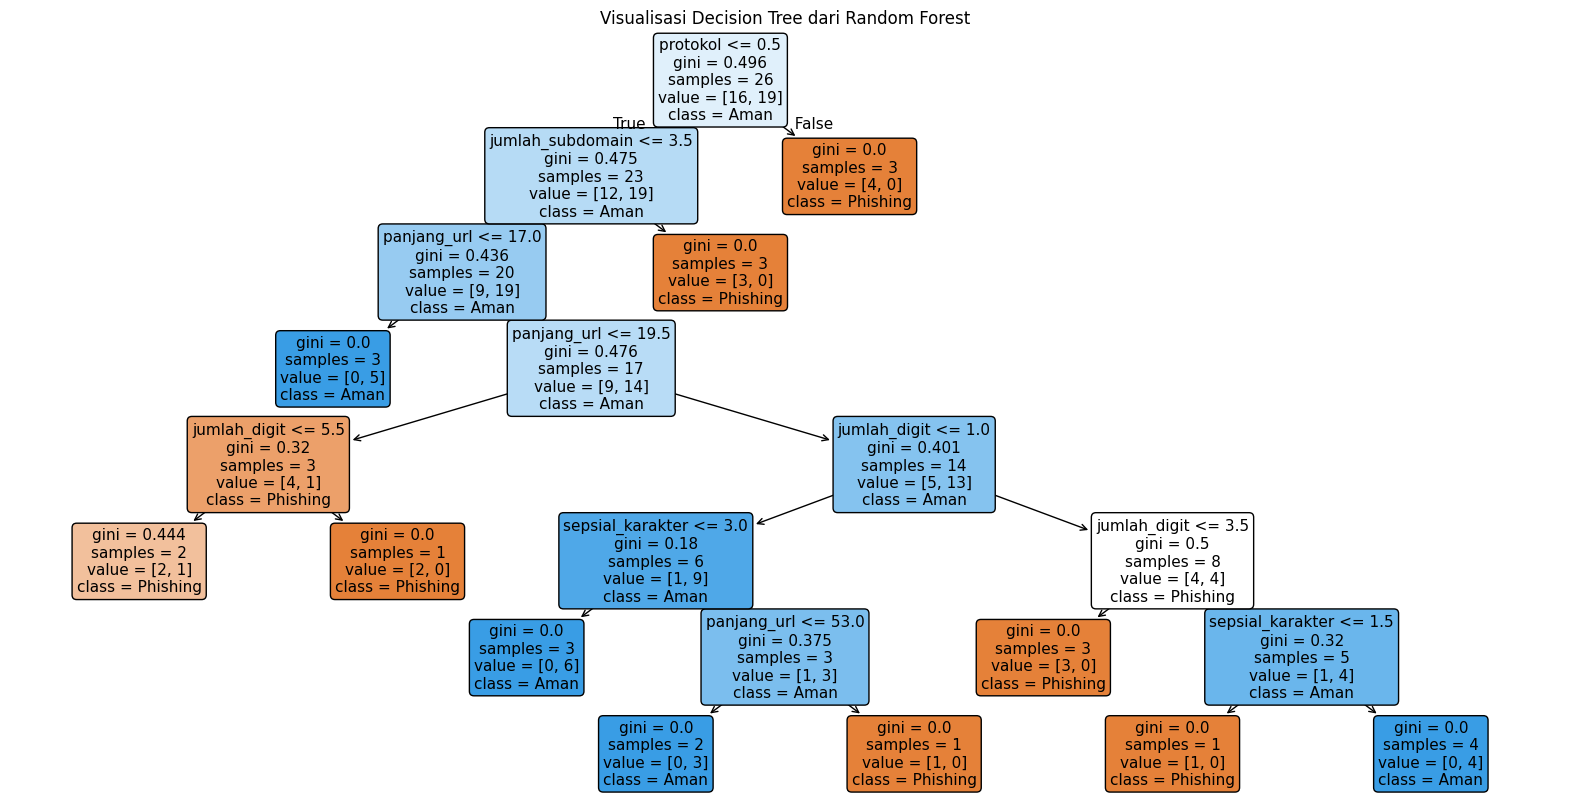

In [25]:
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, class_names=["Phishing", "Aman"])
plt.title("Visualisasi Decision Tree dari Random Forest")
plt.show()

In [26]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)
print(f"Mean Squared Error (MSE) for Random Forest Regressor: {mse:.2f}")


Accuracy: 80.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

Mean Squared Error (MSE) for Random Forest Regressor: 0.16


In [27]:

joblib.dump(model, 'phishing_model.pkl')


['phishing_model.pkl']

In [28]:
new_url = "https://happymod.id.uptodown.com/android/download"

In [29]:
def extract_features(url):
    features = {}
    features['panjang_url'] = len(url)
    features['protokol'] = int("https" in url)
    features['sepsial_karakter'] = sum([1 for char in url if char in ['@', '-', '_', '%', '.', '=', '&']])
    features['jumlah_digit'] = sum([1 for char in url if char.isdigit()])
    features['jumlah_subdomain'] = url.count('.') - 1
    features['ipaddress'] = int(bool(re.search(r'[0-9]+(?:\.[0-9]+){3}', url)))
    return features

In [30]:
new_features = extract_features(new_url)
new_features_df = pd.DataFrame([new_features])

In [31]:
new_prediction = model.predict(new_features_df)
new_prediction_proba = model.predict_proba(new_features_df)

In [32]:
status = "Phishing" if new_prediction[0] == 0 else "Aman"
probability_phishing = new_prediction_proba[0][0] * 100
probability_safe = new_prediction_proba[0][1] * 100

print(f"URL: {new_url}")
print(f"Prediksi: {status}")
print(f"Probabilitas Phishing: {probability_phishing:.2f}%")
print(f"Probabilitas Aman: {probability_safe:.2f}%")

URL: https://happymod.id.uptodown.com/android/download
Prediksi: Phishing
Probabilitas Phishing: 77.00%
Probabilitas Aman: 23.00%
